## Objectif métier :
#### L'objectif de l'application de restauration universitaire est de proposer des repas sains et équilibrés à ses étudiants. Pour atteindre cet objectif, il est important de comprendre les préférences alimentaires des étudiants et de proposer des plats qui répondent à leurs besoins nutritionnels.

## Objectif Data Mining :
#### L'objectif de la segmentation est de regrouper les recettes en fonction des ingrédients utilisés, afin de mieux comprendre les préférences alimentaires des étudiants et de proposer des plats adaptés à leurs besoins nutritionnels.

In [2]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data comprehention & preparation 

In [3]:
file_path1 = "/kaggle/input/food-com-recipes-and-user-interactions/RAW_recipes.csv"
recipes_df = pd.read_csv(file_path1)

In [4]:
recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [5]:
file_path2 ='/kaggle/input/food-com-recipes-and-user-interactions/RAW_interactions.csv'
interactions_df = pd.read_csv(file_path2)

In [6]:
interactions_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [7]:
Merged_Data = pd.merge(recipes_df,interactions_df, how="outer", left_on = 'id', right_on= 'recipe_id')
Merged_Data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132367 entries, 0 to 1132366
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   name            1132366 non-null  object
 1   id              1132367 non-null  int64 
 2   minutes         1132367 non-null  int64 
 3   contributor_id  1132367 non-null  int64 
 4   submitted       1132367 non-null  object
 5   tags            1132367 non-null  object
 6   nutrition       1132367 non-null  object
 7   n_steps         1132367 non-null  int64 
 8   steps           1132367 non-null  object
 9   description     1108857 non-null  object
 10  ingredients     1132367 non-null  object
 11  n_ingredients   1132367 non-null  int64 
 12  user_id         1132367 non-null  int64 
 13  recipe_id       1132367 non-null  int64 
 14  date            1132367 non-null  object
 15  rating          1132367 non-null  int64 
 16  review          1132198 non-null  object
dtypes: int64

In [8]:
Merged_Data.head()


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,178427,137739,2011-12-05,5,Excellent recipe! I used butternut squash and ...
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,28603,31490,2002-08-19,0,"Have not tried this, but it sounds delicious. ..."
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,346277,31490,2006-08-27,5,This recipe was wonderful. Instead of using t...


### I Détection des doublons

In [9]:
Merged_Data.duplicated().sum()

0

###  | Vérification des valeurs nulles

Text(0.5, 1.0, 'Total Missing Values')

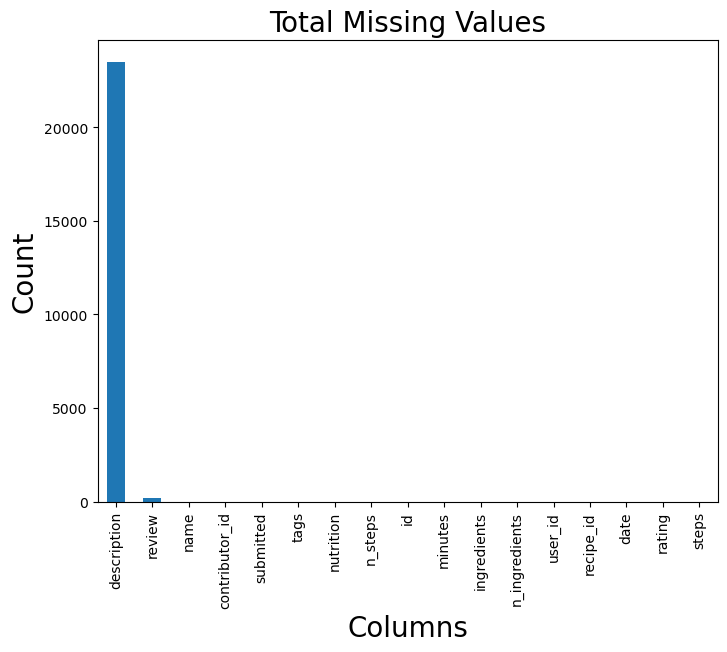

In [10]:
total = Merged_Data.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

###  | Suppression des valeurs nulles

In [11]:
Merged_Data["review"] = Merged_Data["review"].fillna(0)
Merged_Data.dropna(subset=["review"])
Merged_Data["description"] = Merged_Data["description"].fillna(0)
Merged_Data.dropna(subset=["description"])
Merged_Data["name"] = Merged_Data["name"].fillna(0)
Merged_Data.dropna(subset=["name"])

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,178427,137739,2011-12-05,5,Excellent recipe! I used butternut squash and ...
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,28603,31490,2002-08-19,0,"Have not tried this, but it sounds delicious. ..."
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,346277,31490,2006-08-27,5,This recipe was wonderful. Instead of using t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132362,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,844554,308080,2009-10-14,5,These were very good. I meant to add some jala...
1132363,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,804234,298512,2008-05-02,1,I would rate this a zero if I could. I followe...
1132364,cookies by design sugar shortbread cookies,298509,20,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]",5,"['whip sugar and shortening in a large bowl , ...","i've heard of the 'cookies by design' company,...","['granulated sugar', 'shortening', 'eggs', 'fl...",7,866651,298509,2008-06-19,1,This recipe tastes nothing like the Cookies by...
1132365,cookies by design sugar shortbread cookies,298509,20,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]",5,"['whip sugar and shortening in a large bowl , ...","i've heard of the 'cookies by design' company,...","['granulated sugar', 'shortening', 'eggs', 'fl...",7,1546277,298509,2010-02-08,5,"yummy cookies, i love this recipe me and my sm..."


Text(0.5, 1.0, 'Total Missing Values')

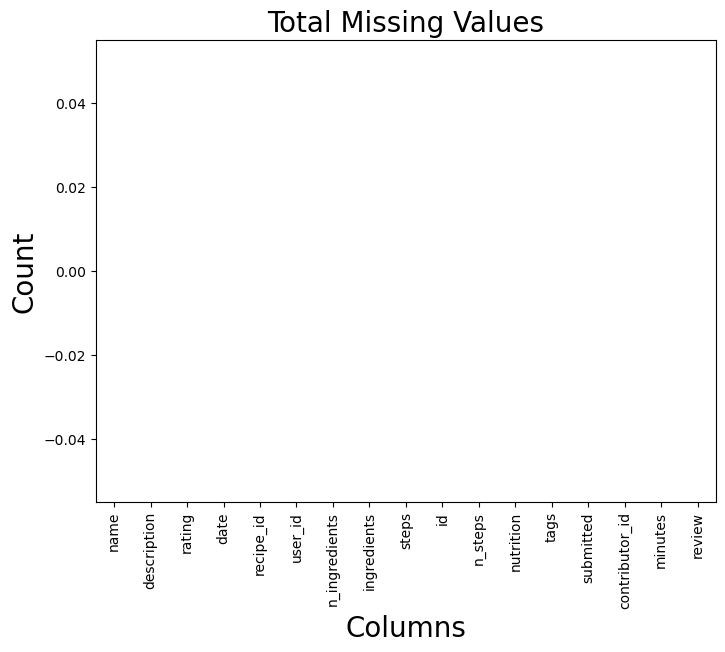

In [12]:
total = Merged_Data.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [13]:
# Check for missing data
print('Recipes and interactions missing data:\n', Merged_Data.isnull().sum())

Recipes and interactions missing data:
 name              0
id                0
minutes           0
contributor_id    0
submitted         0
tags              0
nutrition         0
n_steps           0
steps             0
description       0
ingredients       0
n_ingredients     0
user_id           0
recipe_id         0
date              0
rating            0
review            0
dtype: int64


### | Converting nutritional values column to columns of nutritional values so that we can use them for comparision of different recipes nutritional values.

In [14]:
NutriList=['cal', 'totalFat', 'sugar', 'sodium', 'protein', 'satFat', 'carbs']

NutriList_Columns = pd.DataFrame(Merged_Data['nutrition'].apply(eval).to_list(),\
                        index=Merged_Data.index\
                        ,columns=NutriList)

Merged_Data = Merged_Data.join(NutriList_Columns)
Merged_Data.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,date,rating,review,cal,totalFat,sugar,sodium,protein,satFat,carbs
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,2010-08-21,5,This was a nice change. I used butternut squas...,51.5,0.0,13.0,0.0,2.0,0.0,4.0
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,2011-12-05,5,Excellent recipe! I used butternut squash and ...,51.5,0.0,13.0,0.0,2.0,0.0,4.0
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,2002-08-19,0,"Have not tried this, but it sounds delicious. ...",173.4,18.0,0.0,17.0,22.0,35.0,1.0
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,2006-08-27,5,This recipe was wonderful. Instead of using t...,173.4,18.0,0.0,17.0,22.0,35.0,1.0


### I Vérification des outliers

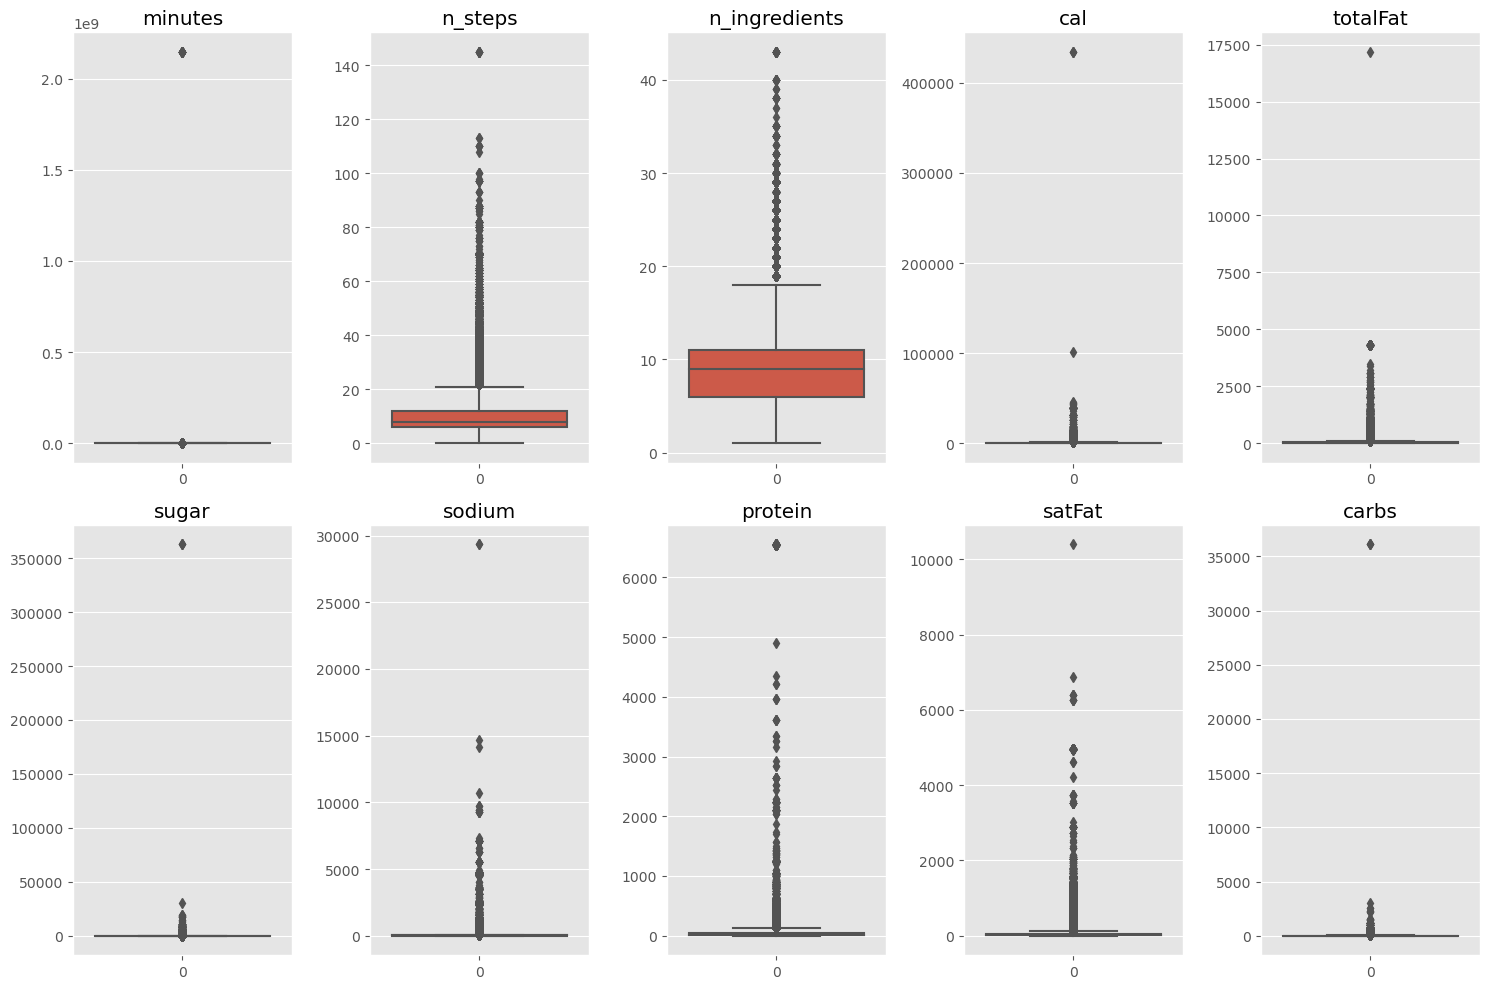

In [15]:
#Get all numeric columns
numeric_columns = ['minutes', 'n_steps', 'n_ingredients', 'cal', 'totalFat', 'sugar', 'sodium', 'protein', 'satFat', 'carbs']

plt.style.use('ggplot')
fig, axis = plt.subplots(2,5,figsize=(15,10))
axis = axis.ravel()
for i,ax in enumerate(axis):
    sns.boxplot(data=Merged_Data[numeric_columns[i]],ax=ax)
    ax.set(title=numeric_columns[i])
plt.tight_layout()
plt.show()

####  To remove the outliers i will set my lower and upper bound as : lower bound = Q1 - 1.5 * IQR upper bound = Q3 + 1.5 * IQR.

#### The values out of these range are considered as outliers and we have to remove them.

In [16]:
# Removing values according to IQR
Columns_Remove_Outliers=['n_steps','minutes','n_ingredients','cal', 'totalFat', 'sugar',   'sodium', 'protein', 'satFat', 'carbs']
for col in Columns_Remove_Outliers:
    IQR = Merged_Data[col].quantile(0.75) - Merged_Data[col].quantile(0.25)
    colmax = Merged_Data[col].quantile(0.75) + 1.5 * IQR
    colmin = Merged_Data[col].quantile(0.25) - 1.5 * IQR
    Merged_Data = Merged_Data[ (Merged_Data[col] < colmax) & (Merged_Data[col] > colmin) ]

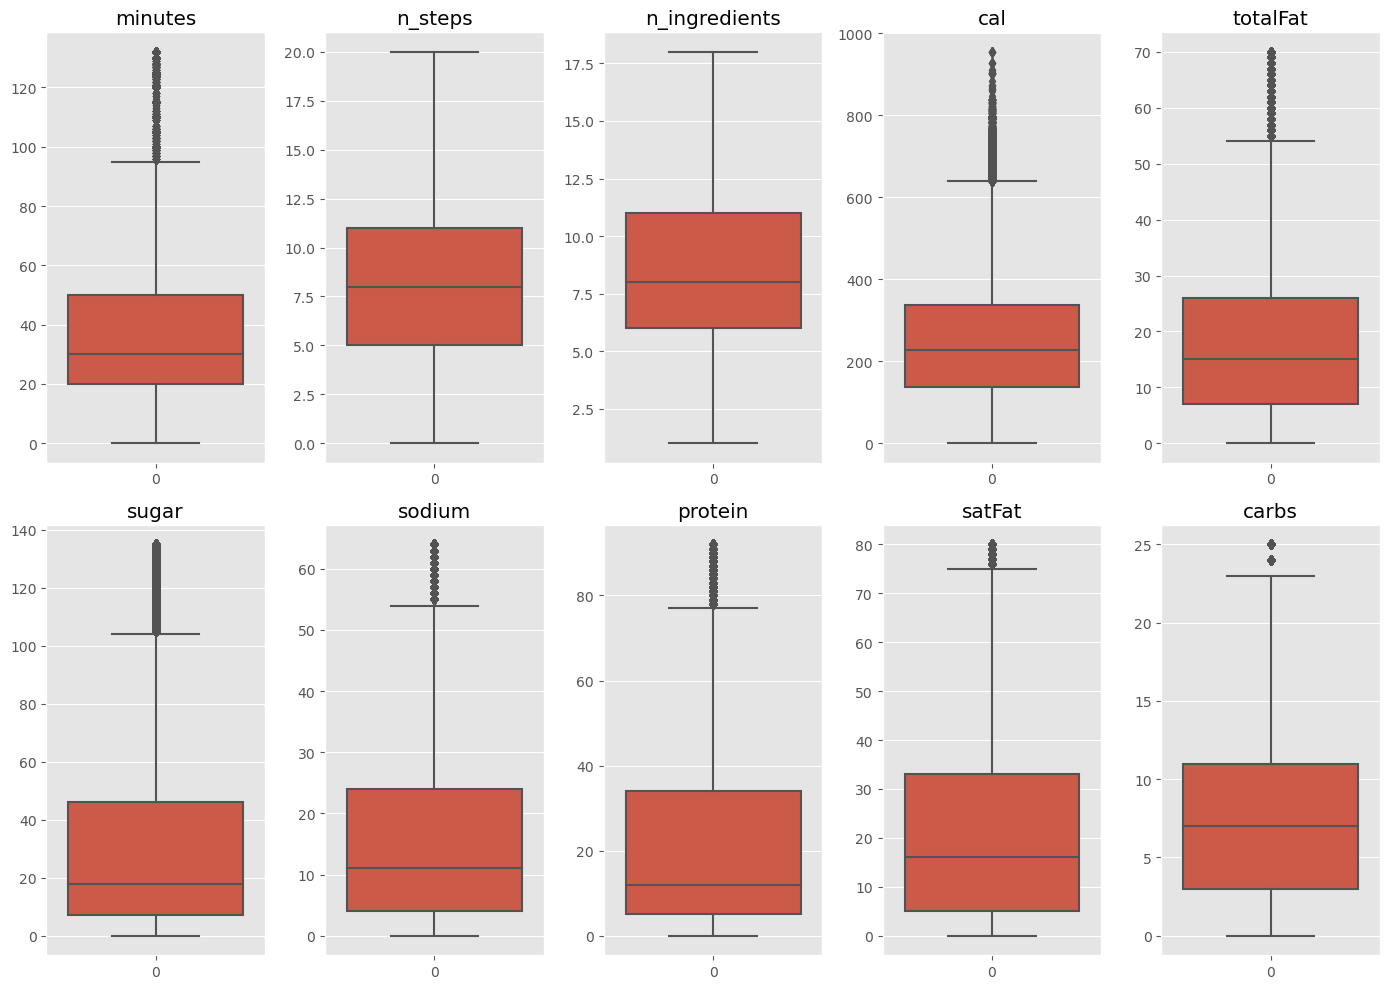

In [17]:
#Now we will look at distributions again
plt.style.use('ggplot')
fig, axis = plt.subplots(2,5,figsize=(14,10))
axis = axis.ravel()
for i,ax in enumerate(axis):
    sns.boxplot(data=Merged_Data[numeric_columns[i]],ax=ax)
    ax.set(title=numeric_columns[i])
plt.tight_layout()
plt.show()
     

## Get the most common ingredients used in recipes

In [18]:
ingredients = []
for row in Merged_Data['ingredients']:
    ingredients.extend(row.split(', '))
ingredient_counts = pd.Series(ingredients).value_counts()
print('Top 10 most common ingredients:\n', ingredient_counts[:10])

Top 10 most common ingredients:
 'salt'             249156
'butter'           112233
'sugar'            109629
'onion'            102226
'eggs'              84861
'olive oil'         70117
'water'             69159
'milk'              68433
'baking powder'     64750
'garlic cloves'     61766
dtype: int64


## Ajout d'une colonne food type

In [19]:
Merged_Data['food_types'] = np.nan
Merged_Data['food_types'] = Merged_Data['food_types'].astype('str')

In [20]:
#Merged_Data['food types'] = ''
for i in Merged_Data.index:
    if 'eggs' in Merged_Data['ingredients'][i]:
        if 'ice-cream' in Merged_Data['ingredients'][i] or 'chocolate' in Merged_Data['ingredients'][i] or 'cookies' in Merged_Data['ingredients'][i]:
            Merged_Data.loc[i, 'food_types'] = 'Not healthy'
        else:
            Merged_Data.loc[i, 'food_types'] = 'Healthy'
    elif 20 < Merged_Data['cal'][i] < 300:
        Merged_Data.loc[i, 'food_types'] = 'Healthy'
    elif any(x in Merged_Data['ingredients'][i] for x in ['chicken', 'ham', 'pepperoni']):
        Merged_Data.loc[i, 'food_types'] = 'Not healthy'
    else:
        Merged_Data.loc[i, 'food_types'] = 'Healthy'


KeyboardInterrupt: 

In [ ]:
Merged_Data['food_types'].value_counts()

In [ ]:
Merged_Data.head()

## Vérification de corrélation entre les variables 


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(Merged_Data.corr(),annot=True,cmap='rainbow')
fig=plt.gcf()
fig.set_size_inches(11,11)
plt.show()

### Dropping Id columns

In [ ]:
Merged_Data = Merged_Data.drop(['user_id', 'recipe_id', 'contributor_id', 'id','date','submitted','tags', 'nutrition', 'steps', 'description', 'review'], axis=1)


In [ ]:
Merged_Data = Merged_Data.dropna()


In [ ]:
Merged_Data.info()

In [ ]:
Merged_Data.head() 

In [27]:
#One hot encoding # ajout de colonne healthy, not healthy DONE
#drop : tags, nutrition, steps, description, review DONE

#### One-hot encoding is a way to represent categorical data numerically, where each unique category is represented by a binary feature (either 0 or 1)

In [28]:
#Merged_Data = pd.get_dummies(Merged_Data, columns=['ingredients'], sparse=True)

In [29]:
#Merged_Data = pd.get_dummies(Merged_Data, columns=['food types'], sparse=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Instancier un encodeur one hot
encoder = OneHotEncoder(sparse=True)

# Sélectionner la colonne 'ingredients' dans le dataframe Merged_Data
food_types = Merged_Data[['food_types']]
#name = Merged_Data[['name']]

# Encoder la colonne 'food types' en one hot encoding
encoded_ft = encoder.fit_transform(food_types)

#encoded_name = encoder.fit_transform(name)

# Remplacer la colonne 'food types' dans le dataframe Merged_Data par les données encodées
Merged_Data.drop('food_types', axis=1, inplace=True)
#Merged_Data.drop('name', axis=1, inplace=True)
# Convert the sparse matrix to a pandas dataframe
encoded_ft = pd.DataFrame(encoded_ft.toarray(), columns=encoder.get_feature_names())

# Concatenate the dataframes
Merged_Data = pd.concat([Merged_Data, encoded_ft], axis=1)


## ACP

In [31]:
# Convert the data to a numpy array
#Merged_Data = Merged_Data.to_numpy()

In [32]:
Merged_Data.head()

,name,minutes,n_steps,ingredients,n_ingredients,rating,cal,totalFat,sugar,sodium,protein,satFat,carbs,x0_Healthy,x0_Not healthy
0,arriba baked winter squash mexican style,55.0,11.0,"['winter squash', 'mexican seasoning', 'mixed ...",7.0,5.0,51.5,0.0,13.0,0.0,2.0,0.0,4.0,1.0,0.0
1,arriba baked winter squash mexican style,55.0,11.0,"['winter squash', 'mexican seasoning', 'mixed ...",7.0,5.0,51.5,0.0,13.0,0.0,2.0,0.0,4.0,1.0,0.0
2,arriba baked winter squash mexican style,55.0,11.0,"['winter squash', 'mexican seasoning', 'mixed ...",7.0,5.0,51.5,0.0,13.0,0.0,2.0,0.0,4.0,1.0,0.0
3,a bit different breakfast pizza,30.0,9.0,"['prepared pizza crust', 'sausage patty', 'egg...",6.0,0.0,173.4,18.0,0.0,17.0,22.0,35.0,1.0,1.0,0.0
4,a bit different breakfast pizza,30.0,9.0,"['prepared pizza crust', 'sausage patty', 'egg...",6.0,5.0,173.4,18.0,0.0,17.0,22.0,35.0,1.0,1.0,0.0


In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Merged_Data = Merged_Data.to_numpy()
# Select relevant variables/features
X = Merged_Data[['minutes', 'n_steps', 'n_ingredients', 'cal', 'totalFat', 'sugar', 'sodium', 'protein', 'satFat', 'carbs']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#1.1- Centrer-réduire les valeurs (optionnel)
#scaler.fit(X)
#X=scaler.transform(X) 

In [22]:
num_df = Merged_Data.select_dtypes(include=['int64', 'float64'])
scaled_data = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)

In [23]:
#1.2- Réaliser l'ACP
# Perform PCA
pca = PCA()
# Modèle d'ACP
#pca.fit(X)

pcs = pca.fit_transform(X_scaled) # Résultats de l'ACP

# Pourcentage de la variance expliquée par chacune des composantes sélectionnées.
eig_vals = pca.explained_variance_ #  Pourcentages
eig_vecs = pca.components_.T # Axes principaux dans l'espace des caractéristiques
                             # représentant les directions de la variance maximale dans les données. 
                            # Les composantes sont triées par variance expliquée.
# Bruit estimé lié à la covariance
print(pca.noise_variance_)

0.0


In [24]:
pcs

array([[-2.34656962e+00,  6.11356226e-01,  1.26651646e+00, ...,
        -9.08061593e-02,  5.59761222e-05, -5.12442498e-02],
       [-2.34656962e+00,  6.11356226e-01,  1.26651646e+00, ...,
        -9.08061593e-02,  5.59761221e-05, -5.12442498e-02],
       [-2.34656962e+00,  6.11356226e-01,  1.26651646e+00, ...,
        -9.08061593e-02,  5.59761220e-05, -5.12442498e-02],
       ...,
       [-1.57659064e+00, -2.57397522e-01, -7.24410535e-01, ...,
        -1.13550369e-01,  2.54076816e-01,  2.69609709e-02],
       [-1.57659064e+00, -2.57397522e-01, -7.24410535e-01, ...,
        -1.13550369e-01,  2.54076816e-01,  2.69609709e-02],
       [-1.57659064e+00, -2.57397522e-01, -7.24410535e-01, ...,
        -1.13550369e-01,  2.54076816e-01,  2.69609709e-02]])

In [ ]:
#1.3- Contrôler l'ACP par un diagramme de pareto
y = list(pca.explained_variance_ratio_)
x = range(len(y))
ycum = np.cumsum(y)
plt.bar(x,y)
plt.plot(x,ycum,"-r")
plt.show()

# Plot the scree plot
#fig, ax = plt.subplots()

#ax.plot(np.arange(len(eig_vals))+1, eig_vals/np.sum(eig_vals), '-o')
#ax.plot(pca.explained_variance_ratio_.cumsum(), linewidth=2)
#ax.set_xlabel('Principal Component')
#ax.set_ylabel('Proportion of Variance Explained')
#ax.set_title('Scree Plot')
#plt.show()

### Remarque importante : pour qu'un pareto soit pertinent, il ne faut pas fixer le nombre de composante retenues sinon on ignore volontairement une partie de la variance perdu. Ici, si on avait eu plus de 17 variables, le choix de 5 composantes nous aurait conduit à négliger la variance des composantes au-delà de 17.
### Ici je ne peux avoir que 9 composantes (car j'ai 17 variables à la base). Mes deux premières composantes absorbent bien la majorité de la variabilité.

In [ ]:
# Visualize the variables and their loadings

loadings = pd.DataFrame(pca.components_.T[:, :2], columns=['PC1', 'PC2'], index=num_df.columns[:-1])
loadings.loc['new_row'] = [0, 0]
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('PCA Variables', fontsize=18, fontweight='bold')
ax.set_xlabel('Principal Component', fontsize=14)
ax.set_ylabel('Loading', fontsize=14)
ax.plot(range(1, num_df.shape[1]+1), loadings.loc[:, 'PC1'], linewidth=2, linestyle='--', label='PC1')
ax.plot(range(1, num_df.shape[1]+1), loadings.loc[:, 'PC2'], linewidth=2, linestyle='--', label='PC2')
ax.legend(fontsize=12, loc='upper left')
plt.show()

### Loadings represent the correlation between the variables and the principal components. Here's an interpretation of the plot:

### PC1 is positively correlated with totalFat, sodium, and calories (cal), which are located on the right-hand side of the plot. This suggests that these variables have a strong influence on the variation captured by PC1. On the other hand, PC1 is negatively correlated with minutes, n_steps, and n_ingredients, which are located on the left-hand side of the plot. This suggests that these variables have a weaker influence on PC1.
### PC2 is positively correlated with sugar and carbohydrates (carbs), which are located on the top of the plot. This suggests that these variables have a strong influence on the variation captured by PC2. On the other hand, PC2 is negatively correlated with protein and saturated fat (satFat), which are located on the bottom of the plot. This suggests that these variables have a weaker influence on PC2.

In [ ]:
!pip install plotly

In [ ]:
import plotly.graph_objs as go
import numpy as np

# Biplot
#fig = go.Figure()

# Set limits for the plot
#xmin, xmax = np.min(pcs[:, 0]), np.max(pcs[:, 0])
#ymin, ymax = np.min(pcs[:, 1]), np.max(pcs[:, 1])
#fig.update_xaxes(range=[xmin - 0.1 * (xmax - xmin), xmax + 0.1 * (xmax - xmin)])
#fig.update_yaxes(range=[ymin - 0.1 * (ymax - ymin), ymax + 0.1 * (ymax - ymin)])

# Plot individual scores
#fig.add_trace(go.Scatter(x=pcs[:, 0], y=pcs[:, 1], mode='markers', marker_color='blue', text=X.index))

# Plot variable loadings
#fig.add_trace(go.Scatter(x=eig_vecs[:, 0], y=eig_vecs[:, 1], mode='markers+text', marker_color='red', text=X.columns, textposition='bottom center'))

# Set axis labels
#fig.update_xaxes(title='PC1 ({:.1%})'.format(eig_vals[0] / np.sum(eig_vals)))
#fig.update_yaxes(title='PC2 ({:.1%})'.format(eig_vals[1] / np.sum(eig_vals)))

# Show plot
#fig.show()

### In this specific case, we can see that recipes that are located in the lower right quadrant of the plot have a higher amount of unhealthy nutrients (calories, sugar, etc.) and a lower amount of healthy nutrients (protein, etc.), while recipes in the upper left quadrant have the opposite pattern. This suggests that PC1 is related to the overall healthiness of the recipe. On the other hand, recipes that are located in the upper right quadrant have a higher number of ingredients and longer cooking times, while recipes in the lower left quadrant have the opposite pattern. This suggests that PC2 is related to the complexity of the recipe.


In [ ]:
import numpy as np
# Génération de données selon une loi normale tridimensionnelle

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Affichage du nuage de points
fig = plt.figure()
ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pcs[:, 0], pcs[:, 1])
plt.title("Données initiales")
plt.show()

In [ ]:
# Create the correlation circle with a unit circle
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(len(eig_vals)):
    ax.arrow(0, 0, eig_vecs[0,i]*np.sqrt(eig_vals[i]), eig_vecs[1,i]*np.sqrt(eig_vals[i]), head_width=0.1, head_length=0.1, fc='r', ec='r')
    ax.annotate(X.columns[i], (eig_vecs[0,i]*np.sqrt(eig_vals[i]), eig_vecs[1,i]*np.sqrt(eig_vals[i])))

circle = plt.Circle((0, 0), 1, color='b', fill=False)
ax.add_artist(circle)

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Correlation Circle')
plt.show()

In [ ]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(18):
    plt.annotate(X.index[i],(pcs[i,0],pcs[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

# Modeling

## 1. KNN 

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Sélectionner les', colonnes d'intérêt
#Merged_Data['food types'] = Merged_Data['food types'].replace({'Not healthy': 0, 'Healthy': 1})

#X = Merged_Data[['minutes', 'n_steps', 'n_ingredients', 'cal', 'totalFat', 'sugar', 'sodium', 'protein', 'satFat', 'carbs']]

#Merged_Data = Merged_Data[X]



In [ ]:
# Supprimer les lignes avec des valeurs manquantes
#Merged_Data = Merged_Data.dropna()

# Séparer les variables indépendantes et la variable cible
X = Merged_Data.iloc[:, :-1]
Y = Merged_Data.iloc[:, -1]

# Encoder les variables catégorielles (ici, les colonnes 'name' et 'ingredients')
encoder = OrdinalEncoder()
X[['name', 'ingredients']] = encoder.fit_transform(X[['name', 'ingredients']])


In [ ]:
# Diviser le jeu de données en ensemble d'entraînement et ensemble de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Créer le classificateur KNN
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Entraîner le classificateur sur l'ensemble d'entraînement
knn.fit(X_train, Y_train)

# Faire des prédictions sur l'ensemble de test
Y_pred = knn.predict(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Sélectionner les colonnes d'intérêt
Merged_Data['food_types'] = Merged_Data['food_types'].replace({'Not healthy': 0, 'Healthy': 1})

X = Merged_Data[['minutes', 'n_steps', 'n_ingredients', 'cal', 'totalFat', 'sugar', 'sodium', 'protein', 'satFat', 'carbs']]
y = Merged_Data['food_types']

# Créer une copie des données sélectionnées
Merged_Data = X.copy()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the ratings on the test data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

